In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Amazon Sale Report.csv", encoding="ISO-8859-1")
df.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship,NaN,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,False,NaN,NaN,NaN


In [3]:
df.isnull().sum()
print(df)

         index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128971  128970  406-6001380-7673107  05-31-22                       Shipped   
128972  128971  402-9551604-7544318  05-31-22                       Shipped   
128973  128972  407-9547469-3152358  05-31-22                       Shipped   
128974  128973  402-6184140-0545956  05-31-22                       Shipped   
128975  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel ship-service-level 

In [4]:
df.drop('New', inplace=True, axis=1) 
df.drop('PendingS', inplace=True, axis=1) 
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [14]:
# Ensure necessary columns exist and drop rows with NaN values in critical columns
relevant_columns = ['Category', 'Sales Channel', 'Fulfilment', 'Amount', 'Date']
df = df.dropna(subset=relevant_columns)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') 
print(f"Dataset after cleaning: {df.shape[0]} rows")

Dataset after cleaning: 121176 rows


C:\Users\hp\AppData\Local\Temp\ipykernel_7576\2838065293.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [15]:
category_revenue = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
channel_revenue = df.groupby('Sales Channel')['Amount'].sum().sort_values(ascending=False)
fulfillment_revenue = df.groupby('Fulfilment')['Amount'].sum().sort_values(ascending=False)
print("\nTop Categories by Revenue:")
print(category_revenue.head(10))

print("\nRevenue by Sales Channel:")
print(channel_revenue)

print("\nRevenue by Fulfillment Method:")
print(fulfillment_revenue)



Top Categories by Revenue:
Category
T-shirt     39206756.65
Shirt       21297770.08
Blazzer     11215104.12
Trousers     5346286.30
Perfume       789419.66
Wallet        458408.18
Socks         150757.50
Shoes         124752.76
Watch            915.00
Name: Amount, dtype: float64

Revenue by Sales Channel:
Sales Channel
Amazon.in    78590170.25
Name: Amount, dtype: float64

Revenue by Fulfillment Method:
Fulfilment
Amazon      54327540.00
Merchant    24262630.25
Name: Amount, dtype: float64


In [16]:
#Seasonal Revenue Trends
df['Month'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Amount'].sum()

print("\nMonthly Revenue Trends:")
print(monthly_revenue)



Monthly Revenue Trends:
Month
2022-03      101683.85
2022-04    28836200.27
2022-05    26226476.75
2022-06    23425809.38
Freq: M, Name: Amount, dtype: float64


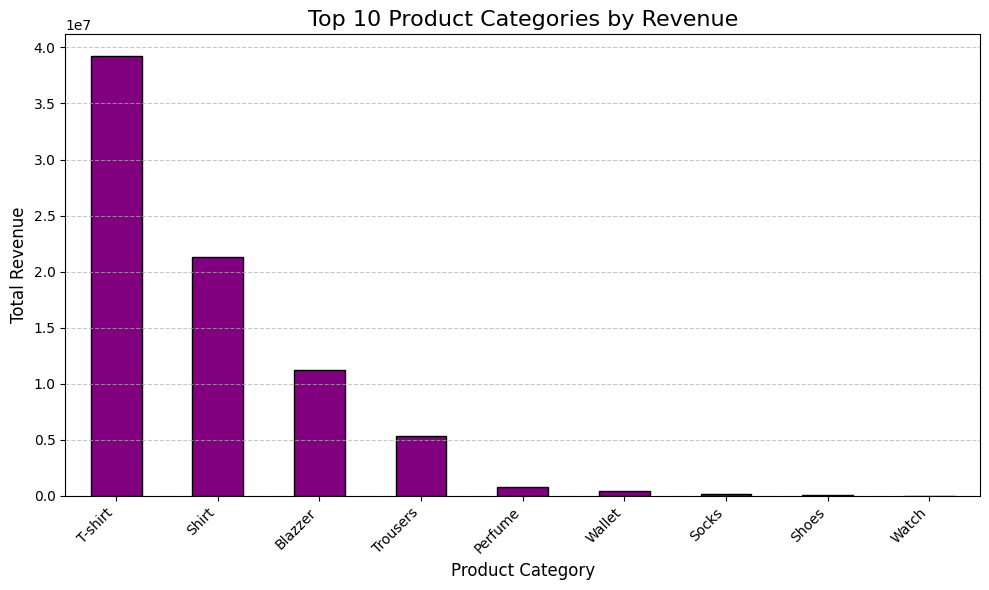

In [8]:
#Bar Graph Top 10 Product Categories by Revenue
plt.figure(figsize=(10, 6))
category_revenue.head(10).plot(kind='bar', color='purple', edgecolor='black')
plt.title("Top 10 Product Categories by Revenue", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

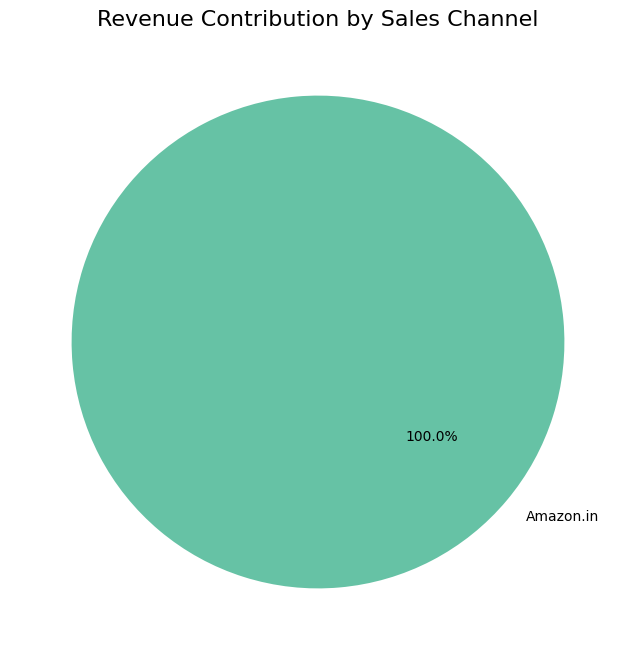

In [9]:
#Pie Chart Revenue Contribution by Sales Channel
plt.figure(figsize=(8, 8))
plt.pie(
    channel_revenue, 
    labels=channel_revenue.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Set2.colors
)
plt.title("Revenue Contribution by Sales Channel", fontsize=16)
plt.show()

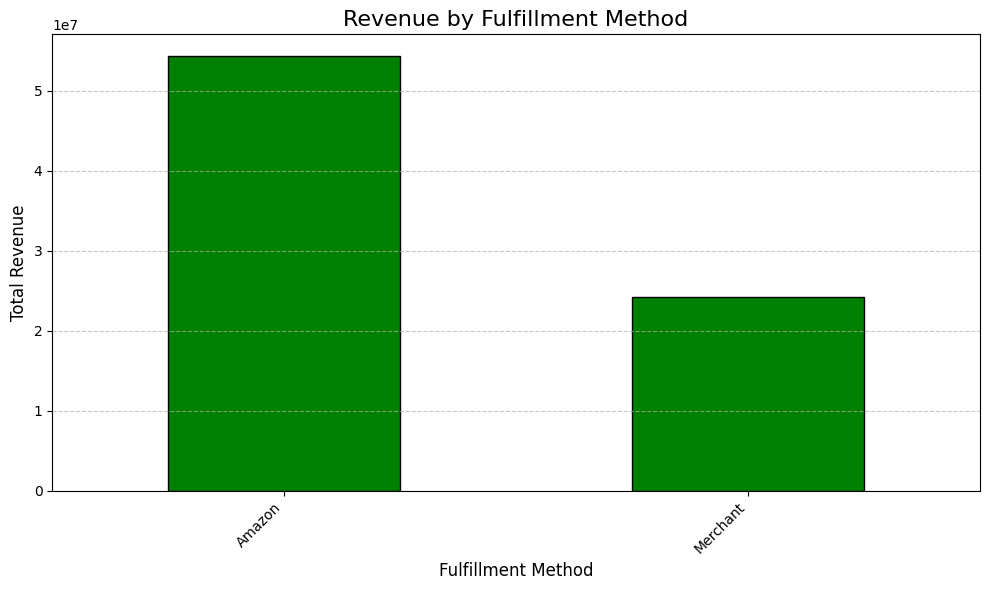

In [10]:
# 5.3 Bar Graph: Revenue by Fulfillment Method
plt.figure(figsize=(10, 6))
fulfillment_revenue.plot(kind='bar', color='green', edgecolor='black')
plt.title("Revenue by Fulfillment Method", fontsize=16)
plt.xlabel("Fulfillment Method", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

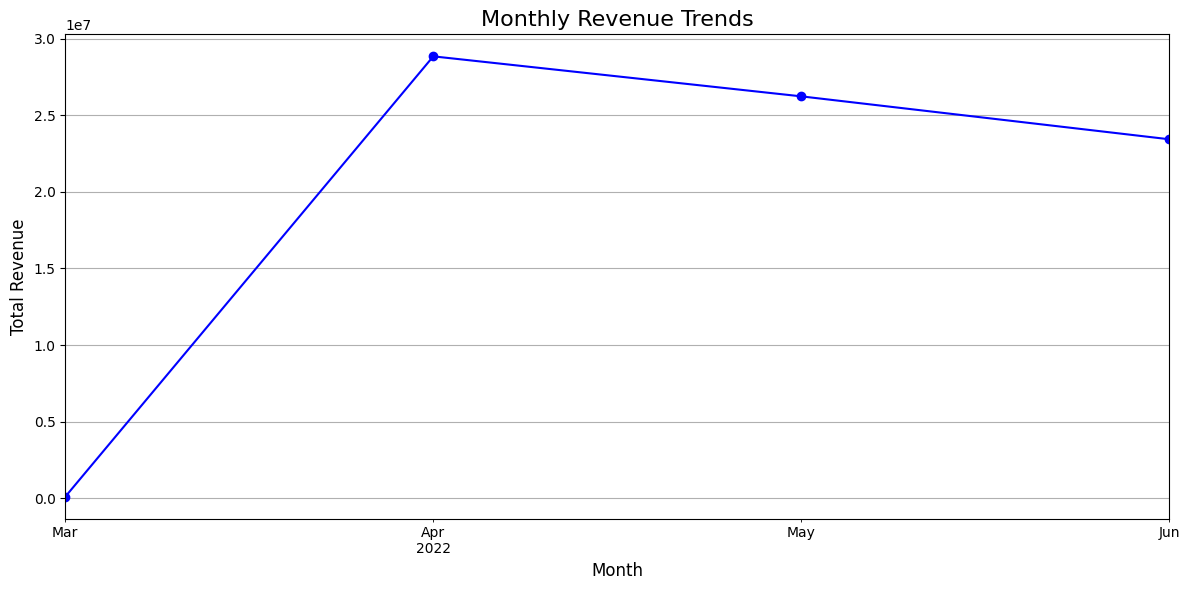

In [11]:
#Line Graph: Monthly Revenue Trends
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Revenue Trends", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_7576\2575102970.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


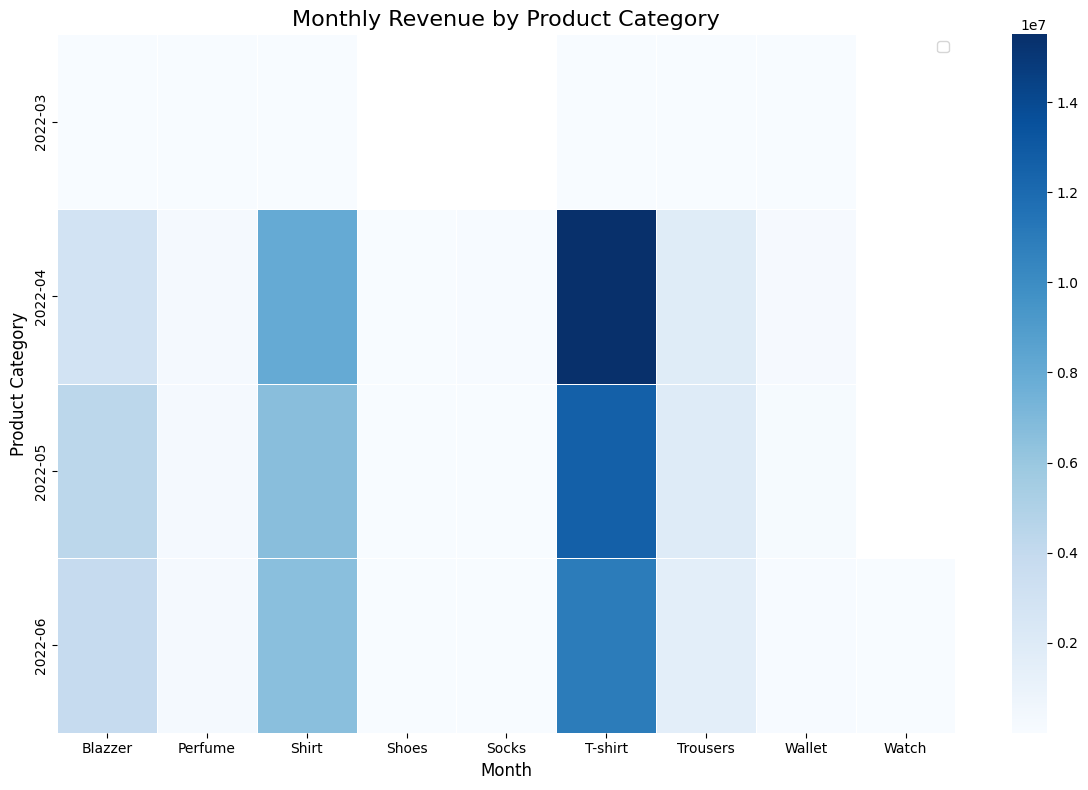

In [17]:
# Heatmap: Monthly Revenue by Category
monthly_category_revenue = df.groupby(['Month', 'Category'])['Amount'].sum().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_category_revenue, cmap='Blues', annot=False, linewidths=0.5)
plt.title("Monthly Revenue by Product Category", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
#  Insights
print("\nRevenue Insights:")
print("Top revenue drivers include specific product categories, sales channels, and fulfillment methods.")
print("Seasonal trends highlight peak and low revenue periods for targeted strategies.")


Revenue Insights:
Top revenue drivers include specific product categories, sales channels, and fulfillment methods.
Seasonal trends highlight peak and low revenue periods for targeted strategies.
